# Analysis of Toto Results
From 27 Dec 2021 - 26 Dec 2024

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

results = pd.read_csv('results/toto_results.csv', index_col=0)
locations = pd.read_csv('results/toto_win_locations.csv', index_col=0)

total_draws = results.index.nunique()

In [17]:
dates = results['Date'].unique()
print(dates.max())

2024-12-30


In [28]:
print(total_draws)
results.head(7)


2198


,Date,Win Number,Win Type
0,2024-12-26,39,additional
1,2024-12-26,8,win
2,2024-12-26,21,win
3,2024-12-26,30,win
4,2024-12-26,35,win
5,2024-12-26,44,win
6,2024-12-26,49,win


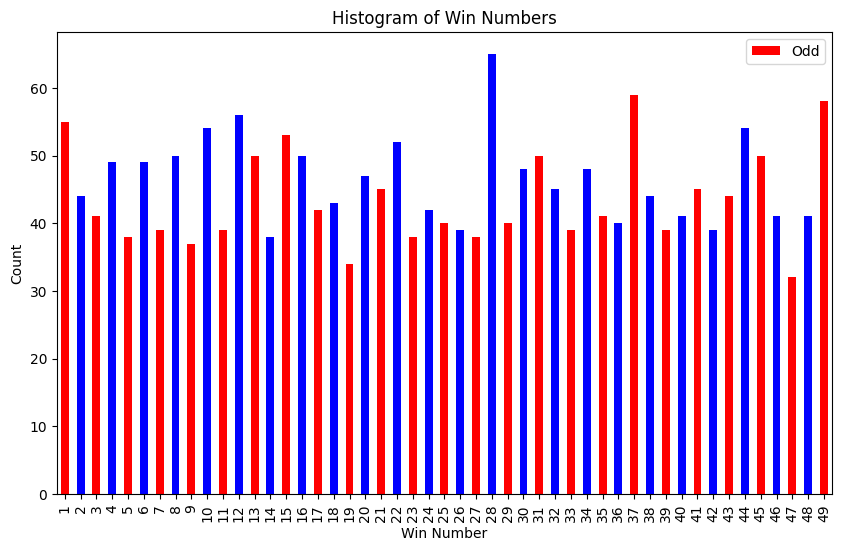

In [19]:
# Count the numbers
number_counts = results['Win Number'].value_counts().sort_index()

# Convert Series to DataFrame
number_counts_df = number_counts.to_frame(name='Count')

# Add a new column 'Odd or Even'
number_counts_df['Odd or Even'] = number_counts_df.index % 2 == 0 # True if even, False if odd

# Plot the histogram
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
number_counts_df['Count'].plot(kind='bar', color=number_counts_df['Odd or Even'].map({True: 'blue', False: 'red'}))
plt.legend(labels=['Odd', 'Even'])
plt.xlabel('Win Number')
plt.ylabel('Count')
plt.title('Histogram of Win Numbers')
plt.show()

In [31]:
## Show the Win Numbers with the smallest counts
number_counts_df.sort_index().sort_values(by='Count', ascending=False).head(15)

,Count,Odd or Even
Win Number,,
28,65,True
37,59,False
49,58,False
12,56,True
1,55,False
10,54,True
44,54,True
15,53,False
22,52,True


In [21]:
# remove latest draw
latest_draw_date = results["Date"].max()
print(latest_draw_date)
results = results[results["Date"] != latest_draw_date]

# Count the numbers
number_counts = results['Win Number'].value_counts().sort_index().sort_values()
print(number_counts.head(10))
# 8, 21, 30, 35, 44, 49, 39


2024-12-30
Win Number
47    32
19    34
9     37
23    38
27    38
5     38
14    38
42    39
26    39
11    39
Name: count, dtype: int64


In [22]:
from scipy.stats import ttest_ind

# Split the odd and even numbers into different dataframes
odd_numbers = number_counts_df[number_counts_df['Odd or Even'] == False]
even_numbers = number_counts_df[number_counts_df['Odd or Even'] == True]

print(f"Mean of odd numbers: {odd_numbers['Count'].mean()}")
print(f"Mean of even numbers: {even_numbers['Count'].mean()}")
# Perform t-test
t_stat, p_value = ttest_ind(even_numbers['Count'], odd_numbers['Count'])
print('t-statistic:', t_stat)
print('p-value:', p_value)

Mean of odd numbers: 43.44
Mean of even numbers: 46.625
t-statistic: 1.6066093535074768
p-value: 0.11483859812677245


In [23]:
# Split the 1-24 and 25-49 numbers into different dataframes
bot_half_numbers = number_counts_df[number_counts_df.index < 25]
top_half_numbers = number_counts_df[number_counts_df.index >= 25]

# Perform t-test
t_stat, p_value = ttest_ind(bot_half_numbers['Count'], top_half_numbers['Count'])
print('t-statistic:', t_stat)
print('p-value:', p_value)

t-statistic: 0.2006282189801797
p-value: 0.841854960170487


In [24]:
Fibonacci = [1, 2, 3, 5, 8, 13, 21, 34]
Fibonacci_numbers = number_counts_df[number_counts_df.index.isin(Fibonacci)]
Non_Fibonacci_numbers = number_counts_df[~number_counts_df.index.isin(Fibonacci)]

# Perform t-test
t_stat, p_value = ttest_ind(Fibonacci_numbers['Count'], Non_Fibonacci_numbers['Count'])
print('t-statistic:', t_stat)
print('p-value:', p_value)

t-statistic: 0.5989890355774979
p-value: 0.5520565572080192


In [25]:
eight = [8, 18, 28, 38, 48]
eight = number_counts_df[number_counts_df.index.isin(eight)]
non_eight = number_counts_df[~number_counts_df.index.isin(eight)]

print(f"Mean of numbers ending with eight: {odd_numbers['Count'].mean()}")
print(f"Mean of numbers not ending with eight: {even_numbers['Count'].mean()}")

# Perform t-test
t_stat, p_value = ttest_ind(eight['Count'], non_eight['Count'])
print('t-statistic:', t_stat)
print('p-value:', p_value)

Mean of numbers ending with eight: 43.44
Mean of numbers not ending with eight: 46.625
t-statistic: 1.051162987041134
p-value: 0.29804431661552316
